In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns


In [2]:
!unzip /content/drive/MyDrive/minor2/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: datset/T/Normal/Normal-1389.png  
  inflating: datset/T/Normal/Normal-1390.png  
  inflating: datset/T/Normal/Normal-1391.png  
  inflating: datset/T/Normal/Normal-1392.png  
  inflating: datset/T/Normal/Normal-1393.png  
  inflating: datset/T/Normal/Normal-1394.png  
  inflating: datset/T/Normal/Normal-1395.png  
  inflating: datset/T/Normal/Normal-1396.png  
  inflating: datset/T/Normal/Normal-1397.png  
  inflating: datset/T/Normal/Normal-1398.png  
  inflating: datset/T/Normal/Normal-1399.png  
  inflating: datset/T/Normal/Normal-1400.png  
  inflating: datset/T/Normal/Normal-1401.png  
  inflating: datset/T/Normal/Normal-1402.png  
  inflating: datset/T/Normal/Normal-1403.png  
  inflating: datset/T/Normal/Normal-1404.png  
  inflating: datset/T/Normal/Normal-1405.png  
  inflating: datset/T/Normal/Normal-1406.png  
  inflating: datset/T/Normal/Normal-1407.png  
  inflating: datset/T/Normal/Normal-1408.png  
  inflati

In [3]:
train_path="datset/T"
val_path="datset/V"

In [4]:
from keras.applications.xception import Xception
from keras.applications.xception  import preprocess_input

In [5]:

IMAGE_SIZE = [224, 224]
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


83697664/83683744 [==============================] - 1s 0us/step


In [6]:
xception.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [7]:
for layer in xception.layers:
  layer.trainable = False

In [8]:
from keras.layers import Dropout 
x = Flatten()(xception.output)
model=Dense(64,activation='relu')(x)
model2 = Dropout(0.5)(model)
prediction = Dense(3, activation='softmax')(model2)
model1 = Model(inputs=xception.input, outputs=prediction)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [9]:
from keras import optimizers


adam = optimizers.Adam(0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [10]:

# Image Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 40,
                                                 class_mode = 'categorical')

Found 7253 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

Found 1212 images belonging to 3 classes.


In [14]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='resnet152V22.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  validation_steps=2,
  callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
182/182 - 126s - loss: 0.3887 - accuracy: 0.7476 - val_loss: 0.1734 - val_accuracy: 0.9000

Epoch 00001: val_loss improved from inf to 0.17342, saving model to resnet152V22.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
182/182 - 99s - loss: 0.3273 - accuracy: 0.7939 - val_loss: 0.2219 - val_accuracy: 0.8250

Epoch 00002: val_loss did not improve from 0.17342
Epoch 3/10
182/182 - 98s - loss: 0.3080 - accuracy: 0.8126 - val_loss: 0.1689 - val_accuracy: 0.9125

Epoch 00003: val_loss improved from 0.17342 to 0.16893, saving model to resnet152V22.h5
Epoch 4/10
182/182 - 97s - loss: 0.2911 - accuracy: 0.8299 - val_loss: 0.2101 - val_accuracy: 0.8875

Epoch 00004: val_loss did not improve from 0.16893
Epoch 5/10
182/182 - 99s - loss: 0.2707 - accuracy: 0.8417 - val_loss: 0.1992 - val_accuracy: 0.8625

Epoch 00005: val_loss did not improve from 0.16893
Epoch 6/10
182/182 - 98s - loss: 0.2758 - accuracy: 0.8348 - val_loss: 0.1395 - val_accuracy: 0.9375

Epoch 00006: val_loss improved from 0.16893 to 0.13951, saving model to resnet152V22.h5
Epoch 7/10
182/182 - 96s - loss: 0.2605 - accuracy: 0.8435 - val_loss: 0.1604 - val_accuracy: 0.9375

Epoch 00007: val_loss did not improve from 0.13951
Epoch 8/

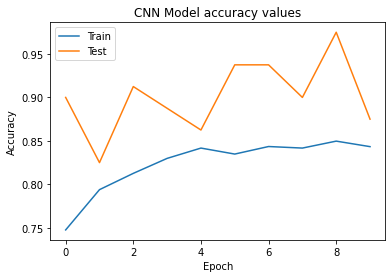

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import matplotlib.pyplot as plt
import itertools 

#by https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(5,5))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [17]:
classes=["COVID",  "Normal","pneumonia"]

In [18]:
resnet152vmodel=model

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix 
Normalized confusion matrix
Confusion matrix, without normalization


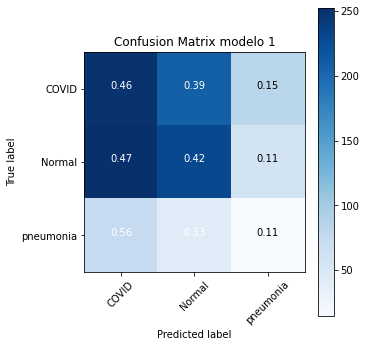

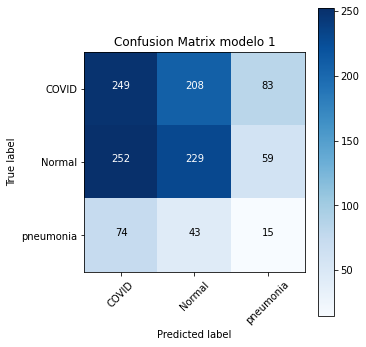

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred =  resnet152vmodel.predict_generator(test_set)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix ')

cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion Matrix modelo 1')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix modelo 1')